# Kitematic
Kitematic es una GUI para administrar contenedores, viene incluida con Docker for Windows, Docker Toolbox y Docker for Mac. En linux debe descargarse [desde aquí](https://github.com/docker/kitematic/releases)

![](images/kite.png)

# Advertencia ⚠️⚠️

Las líneas que tengan doble `%%` son líneas *mágicas* de Jupyter (este formato de archivo), y no son parte de los comandos/archivos de Docker, son agragadas con el fin de ejecutar todo desde este entorno y no recurrir a la temrinal.

# Repaso
* Restart policy

# Restar Policy

* Las restart policies permite definir como debe reiniciarse un contenedor, por defecto es **no**
    * `no` es por defecto, si un contenedor se detiene no se rinicia.
    * `always` siempre
    * `on-failure` cuando haya una falla
    * `unless-stopped` a menos que sea detenido con `docker stop`

# Docker para aplicaciones gráficas
Si bien Docker se presenta como una fomra de ejecutar un comando (entrypoint) y no posee un administrador de procesos, es posible crear imágenes que generen un entorno gráfico. 
Las formas más comunes son VNC (necesita un cliente), noVNC (Web, utiliza un cliente VNC basado en HTML5) y X11 para host Unix.

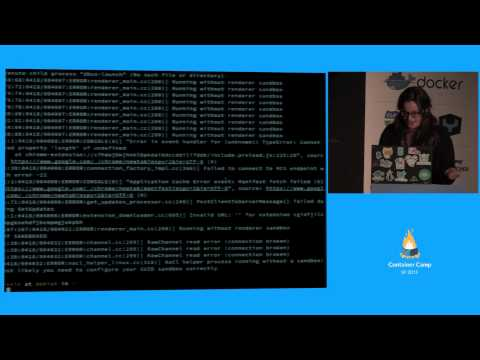

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo('GsLZz8cZCzc')

# Creación de imágenes propias

Para crear una imágen es necesario crear un archivo con nombre `Dockerfile`, en éste se definen una serie de pasos para construir una imagen.

* Empieza con `FROM`, imágen de la cual *heredamos*
* Tiene una serie de comandos que agregar archivos, ejecutan comandos, o definen variables, entre otras cosas y finalmente...
* Define un punto de entrada

El formato es el siguiente
```bash
# Comentrio
INSTRUCCION ARGUMENTOS
```

 # Por ejemplo
 
 ```
 FROM ubuntu:16.04
 RUN apt-get update -q
 RUN apt-get install python
 CMD python2 -m SimpleHTTPServer
 ```
 

# Comandos
* **FROM** define la imagen base
* **RUN** ejecuta un comando
* **CMD** define que comando se ejecuta en el contenedor 

# Para construir la imagen

En el mismo directorio dónde tenemos el Dockerfile:

```
docker build -t servidor .
```

1. **`-t`** es la etiqueta o *tag*
2. **.** es el contexto, el punto hace referencia al directorio actual



# El contexto y el Dockerfile

`docker build -f /path/to/a/Dockerfile .`

Veamos un ejemplo...

In [44]:
%%writefile app.py

from flask import Flask
from glob import glob
app = Flask(__name__)
@app.route('/')
def index():
    
    return "<br/>".join(glob("/data/*"))

app.run(debug=True, host='0', port=3000)

Overwriting app.py


In [45]:
%%writefile Dockerfile

FROM python:2.7
RUN pip install Flask
ADD app.py /app.py
EXPOSE 3000
VOLUME /data
CMD python app.py

Overwriting Dockerfile


In [1]:
%%bash
ls Dockerfile *.py

Dockerfile
app.py


# Construcción

In [2]:
%%bash
docker build -t miservicio .


Step 1/6 : FROM python:2.7
 ---> ca388cdb5ac1
Step 2/6 : RUN pip install Flask
 ---> Using cache
 ---> b3da50436eb1
Step 3/6 : ADD app.py /app.py
 ---> Using cache
 ---> e95279d70d7c
Step 4/6 : EXPOSE 3000
 ---> Using cache
 ---> 94a20edf69c8
Step 5/6 : VOLUME /data
 ---> Using cache
 ---> 6c1eb12c06ac
Step 6/6 : CMD python app.py
 ---> Using cache
 ---> e63b9519b355
Successfully built e63b9519b355
Successfully tagged miservicio:latest


# Ejecución

In [53]:
%%bash
# -d en segundo plano
docker run -P -d miservicio 

2ddac5f1dc44a572498ed74d70cdc23b9170daf2c70fc411767dee6af41ca309


In [54]:
%%bash
docker ps

CONTAINER ID        IMAGE                            COMMAND                  CREATED             STATUS              PORTS                     NAMES
2ddac5f1dc44        miservicio                       "/bin/sh -c 'pytho..."   8 seconds ago       Up 6 seconds        0.0.0.0:32782->3000/tcp   gifted_khorana
621abe4b0815        miservicio                       "/bin/sh -c 'pytho..."   28 seconds ago      Up 26 seconds       0.0.0.0:32781->3000/tcp   agitated_kepler
ea4b29461d6b        nodered/node-red-docker:latest   "npm start -- --us..."   4 hours ago         Up 4 hours          0.0.0.0:2000->1880/tcp    node-red-docker-2


# Otros comandos
* **USER** define un usuario, por defecto se utiliza **root**.
* **WORKDIR** define un directorio de trabajo, por defecto se utiliza /
* **EXPOSE** publica un puerto.
* **VOLUME** define un volumen para persistencia (útil para DBs o compartir datos entre contenedores o con el host).

Existen otros comados documentados en [la guía oficial](https://docs.docker.com/engine/reference/builder/#usage)

# AUFS

Las imágenes e incluso los contenedores, utilizan un sistema de diferencias para almacenamiento. Esto se conoce como el sistema de archivos AUFS, que permite que si múltiples imágenes parten de una misma imágen base, solo se guarda una copia, y en cada imágen derivada, se lamacenan las diferencias.

En el momento de la construcción, esto se aplica de la siguiente manera:

* Cada líneade RUN/ADD/COPY almacena la diferencia contra el paso pervio.
* Si se detecta que la operación ya se realizó, se toma de la caché.
* Si se agregan archivos con ADD/COPY y no cambiaron, se respeta la caché.
* Si cambiaron, no se utiliza la caché.

# Probando Docker en [Play With Docker](http://labs.play-with-docker.com/)
[Play With Docker](http://labs.play-with-docker.com/) nos provee un entorno para ejecutar contenedores en la nube con una terminal interactiva. 

También tenemos disponibles desde ciertos botones en el DockerHub, una forma de crear un conjunto de contenedores enlazados, llamados **stacks**, por ejemplo a continuación, vemos uno creado a partir del popupar gestor de contenidos Wordpress.

In [59]:
from IPython.display import Video
Video('./images/wppwd.mp4')